#  LAPTOP PRICE PREDICTION


### STEP 1: IMPORTING LIBRARIES, DATASET AND CLEANING DATASET

Import the following libraries - pandas, numpy, matplotlib, seaborn and the dataset using pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline  

In [2]:
data = pd.read_csv('laptop_price(3rd).csv')
data.head(10)

,Unnamed: 0,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60
5,5,Acer,Notebook,15.6,0,0,AMD,A9-Series 9420,4,500,HDD,AMD,Radeon R5,2.10,Windows,400.00
6,6,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,256,Flash Storage,Intel,Iris Pro Graphics,2.04,Mac,2139.97
7,7,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,256,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,1158.70
8,8,Asus,Ultrabook,14.0,0,0,Intel,Core i7,16,512,SSD,Nvidia,GeForce MX150,1.30,Windows,1495.00
9,9,Acer,Ultrabook,14.0,0,1,Intel,Core i5,8,256,SSD,Intel,UHD Graphics 620,1.60,Windows,770.00


In [3]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'Touchscreen', 'Ips',
       'Cpu_Vender', 'Cpu_Type', 'Ram', 'Storage (GB)', 'Storage Type',
       'Gpu_Vender', 'Gpu_Type', 'Weight', 'OpSys', 'Price_euros'],
      dtype='object')

Remove unimp columns like Unnamed

In [4]:
data.drop('Unnamed: 0',axis=1,inplace= True)
data.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60


Check for null and duplicate values

In [5]:
data.isnull().sum()

Company         0
TypeName        0
Inches          0
Touchscreen     0
Ips             0
Cpu_Vender      0
Cpu_Type        0
Ram             0
Storage (GB)    0
Storage Type    0
Gpu_Vender      0
Gpu_Type        0
Weight          0
OpSys           0
Price_euros     0
dtype: int64

In [6]:
data.duplicated().sum()

30

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   int64  
 8   Storage (GB)  1303 non-null   int64  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   float64
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 152.8+ KB


Divide ataset into categorial and numerical features

In [8]:
Cat_Vars = data.select_dtypes(include = ['object']).columns
Num_Vars = data.select_dtypes(include = ['int64','float64']).columns

Cat_Vars, Num_Vars

(Index(['Company', 'TypeName', 'Cpu_Vender', 'Cpu_Type', 'Storage Type',
        'Gpu_Vender', 'Gpu_Type', 'OpSys'],
       dtype='object'),
 Index(['Inches', 'Touchscreen', 'Ips', 'Ram', 'Storage (GB)', 'Weight',
        'Price_euros'],
       dtype='object'))

In [9]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

### DATA VISUALISATION AND PREPROCESSING  

CONVERT EUROS TO RUPEES

In [10]:
data['Price'] = data['Price_euros']*84.91
data['Price']

0       113753.0779
1        76328.9954
2        48823.2500
3       215454.8795
4       153143.6760
           ...     
1298     54172.5800
1299    127280.0900
1300     19444.3900
1301     64871.2400
1302     31331.7900
Name: Price, Length: 1303, dtype: float64

In [11]:
data.drop('Price_euros',axis=1,inplace=True)
data.head(10)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,113753.0779
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,76328.9954
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,48823.2500
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,215454.8795
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,153143.6760
5,Acer,Notebook,15.6,0,0,AMD,A9-Series 9420,4,500,HDD,AMD,Radeon R5,2.10,Windows,33964.0000
6,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,256,Flash Storage,Intel,Iris Pro Graphics,2.04,Mac,181704.8527
7,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,256,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,98385.2170
8,Asus,Ultrabook,14.0,0,0,Intel,Core i7,16,512,SSD,Nvidia,GeForce MX150,1.30,Windows,126940.4500
9,Acer,Ultrabook,14.0,0,1,Intel,Core i5,8,256,SSD,Intel,UHD Graphics 620,1.60,Windows,65380.7000


C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

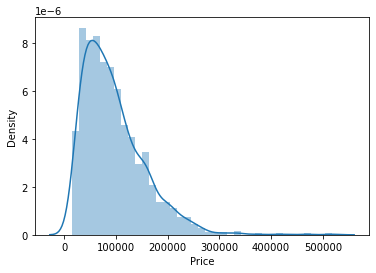

In [12]:
sb.distplot(data['Price'])

Countplot for variables vs price using seaborn 

C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

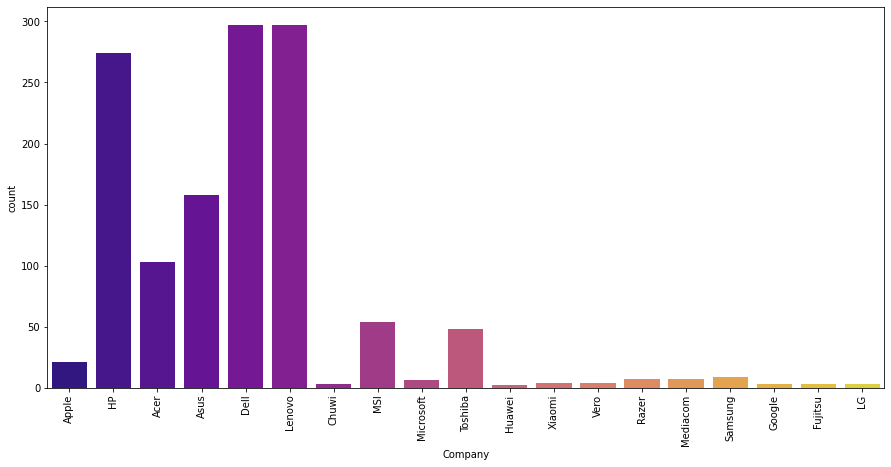

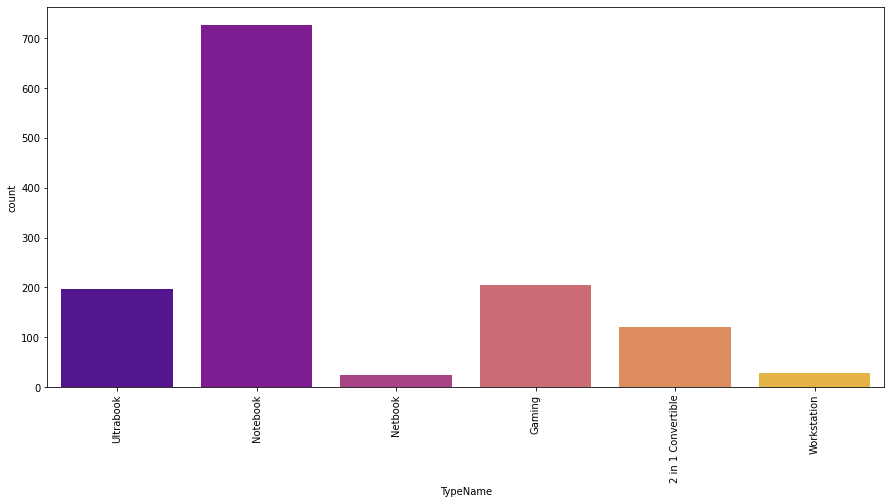

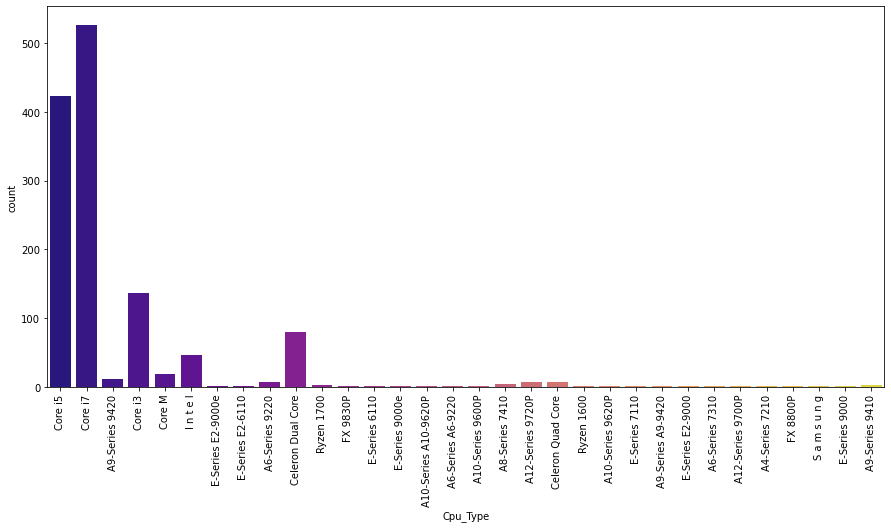

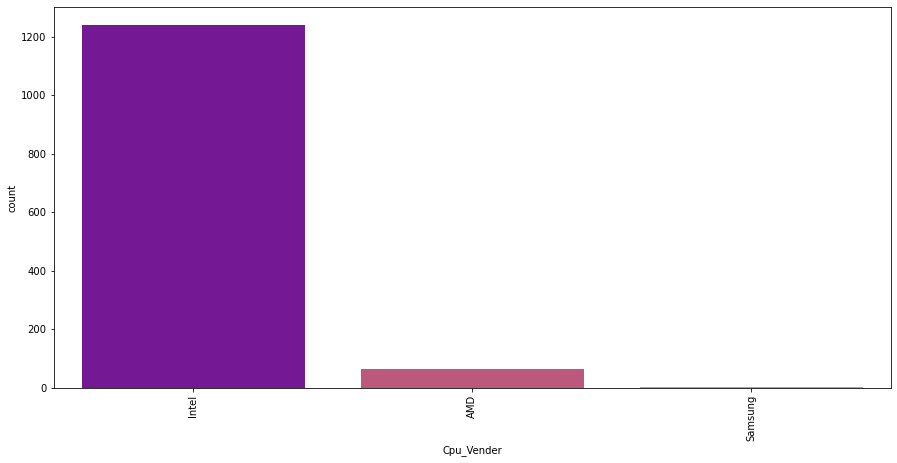

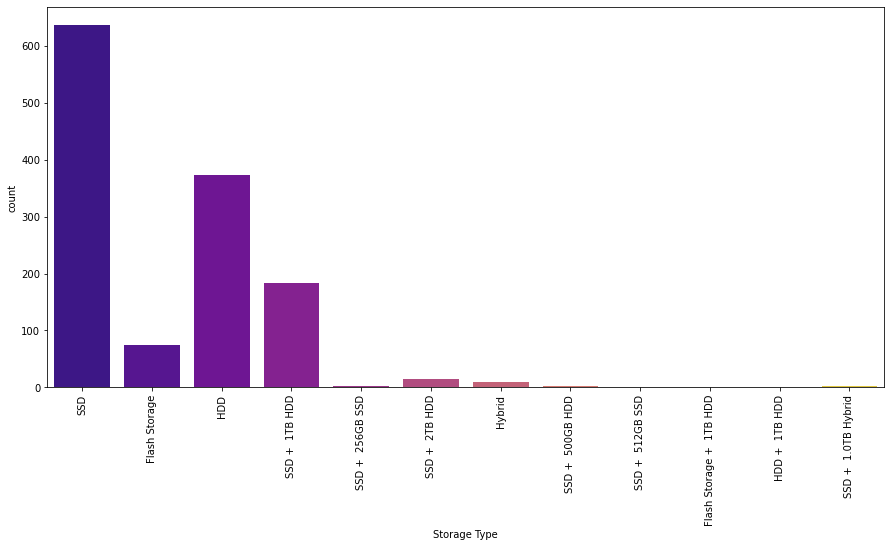

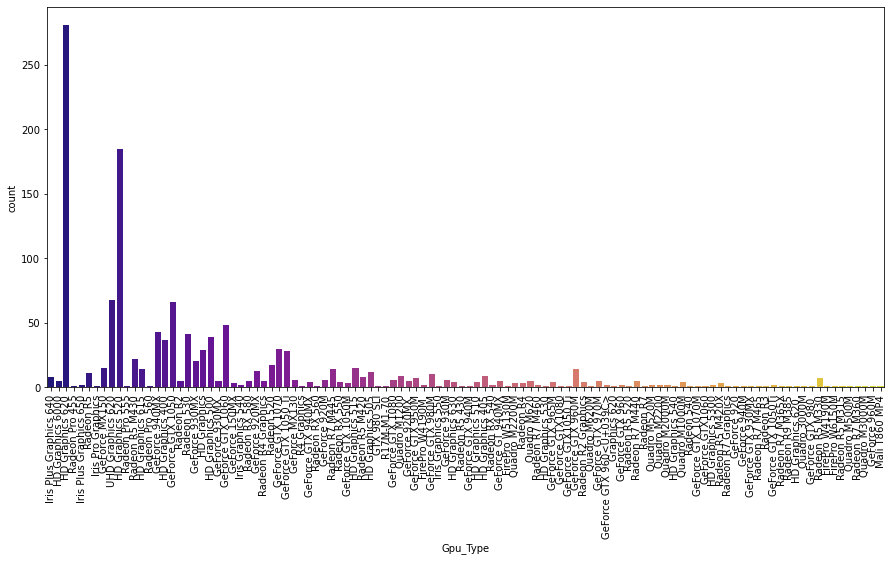

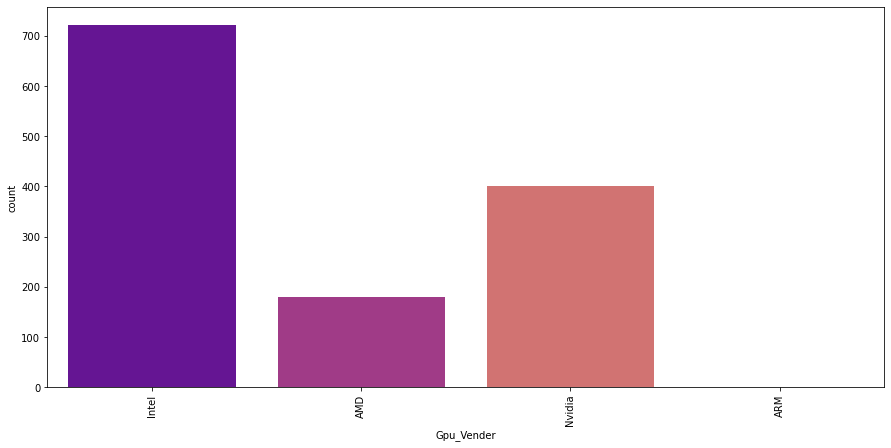

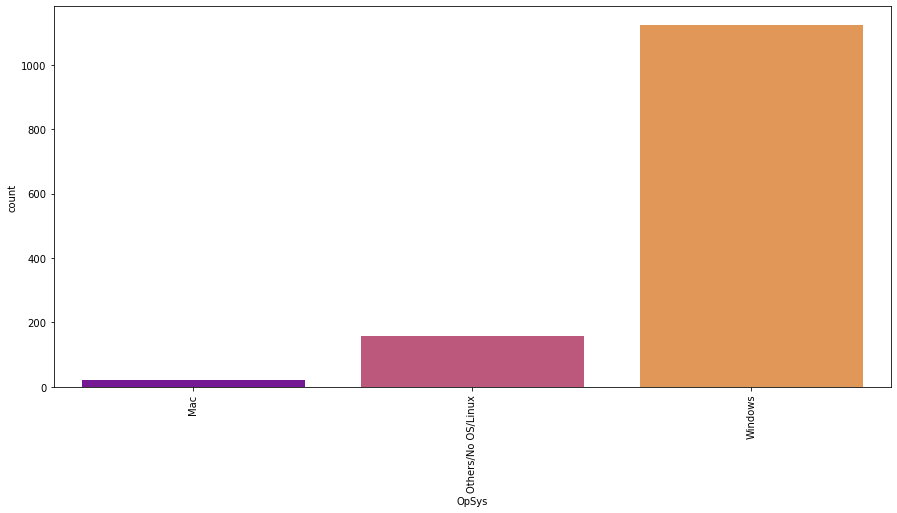

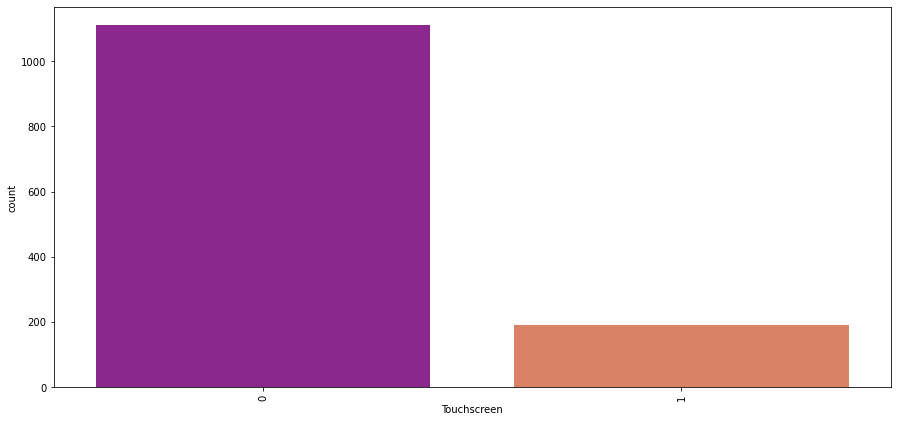

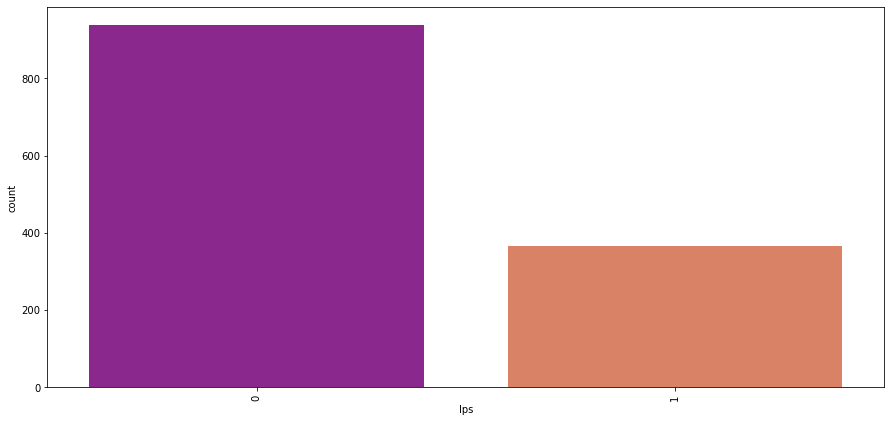

In [15]:
def drawCountPlot(col):
    plt.figure(figsize= (15,7))
    sb.countplot(data[col],palette ='plasma')
    plt.xticks(rotation = 'vertical')
    
cols = ['Company', 'TypeName','Cpu_Type','Cpu_Vender', 'Storage Type', 'Gpu_Type','Gpu_Vender', 'OpSys',
        'Touchscreen','Ips']

for col in cols:
    drawCountPlot(col)

Observing the above graphs we see that we can drop cpu_type , gpu_type columns as they wont help in accurate predictions



In [16]:
data.drop(['Gpu_Type','Cpu_Type'],axis=1,inplace = True)
data.head(10)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Storage Type,Gpu_Vender,Weight,OpSys,Price
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,SSD,Intel,1.37,Mac,113753.0779
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,Flash Storage,Intel,1.34,Mac,76328.9954
2,HP,Notebook,15.6,0,0,Intel,8,256,SSD,Intel,1.86,Others/No OS/Linux,48823.2500
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,SSD,AMD,1.83,Mac,215454.8795
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,SSD,Intel,1.37,Mac,153143.6760
5,Acer,Notebook,15.6,0,0,AMD,4,500,HDD,AMD,2.10,Windows,33964.0000
6,Apple,Ultrabook,15.4,0,1,Intel,16,256,Flash Storage,Intel,2.04,Mac,181704.8527
7,Apple,Ultrabook,13.3,0,0,Intel,8,256,Flash Storage,Intel,1.34,Mac,98385.2170
8,Asus,Ultrabook,14.0,0,0,Intel,16,512,SSD,Nvidia,1.30,Windows,126940.4500
9,Acer,Ultrabook,14.0,0,1,Intel,8,256,SSD,Intel,1.60,Windows,65380.7000


Processing the storage type column

In [19]:
data['Storage Type'] = data['Storage Type'].astype(str).replace('.0',"000",regex=True)

# replace gb by space
data['Storage Type'] = data['Storage Type'].astype(str).replace('GB'," ",regex=True)

# replace tb by 1000 as 1tb = 1000 gb
data['Storage Type'] = data['Storage Type'].astype(str).replace('TB',"000",)

data.head(30)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Storage Type,Gpu_Vender,Weight,OpSys,Price
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,SSD,Intel,1.37,Mac,113753.0779
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,Flash Storage,Intel,1.34,Mac,76328.9954
2,HP,Notebook,15.6,0,0,Intel,8,256,SSD,Intel,1.86,Others/No OS/Linux,48823.2500
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,SSD,AMD,1.83,Mac,215454.8795
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,SSD,Intel,1.37,Mac,153143.6760
5,Acer,Notebook,15.6,0,0,AMD,4,500,HDD,AMD,2.10,Windows,33964.0000
6,Apple,Ultrabook,15.4,0,1,Intel,16,256,Flash Storage,Intel,2.04,Mac,181704.8527
7,Apple,Ultrabook,13.3,0,0,Intel,8,256,Flash Storage,Intel,1.34,Mac,98385.2170
8,Asus,Ultrabook,14.0,0,0,Intel,16,512,SSD,Nvidia,1.30,Windows,126940.4500
9,Acer,Ultrabook,14.0,0,1,Intel,8,256,SSD,Intel,1.60,Windows,65380.7000


In [21]:
data['HDD'] = data['Storage Type'].apply(lambda x:1 if "HDD" in x else 0)
data['Hybrid'] = data['Storage Type'].apply(lambda x:1 if "Hybrid" in x else 0)
data['Flash'] = data['Storage Type'].apply(lambda x:1 if "Flash" in x else 0)
data['SSD'] = data['Storage Type'].apply(lambda x:1 if "SSD" in x else 0)
data.head(30)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Storage Type,Gpu_Vender,Weight,OpSys,Price,HDD,Hybrid,Flash,SSD
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,SSD,Intel,1.37,Mac,113753.0779,0,0,0,1
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,Flash Storage,Intel,1.34,Mac,76328.9954,0,0,1,0
2,HP,Notebook,15.6,0,0,Intel,8,256,SSD,Intel,1.86,Others/No OS/Linux,48823.2500,0,0,0,1
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,SSD,AMD,1.83,Mac,215454.8795,0,0,0,1
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,SSD,Intel,1.37,Mac,153143.6760,0,0,0,1
5,Acer,Notebook,15.6,0,0,AMD,4,500,HDD,AMD,2.10,Windows,33964.0000,1,0,0,0
6,Apple,Ultrabook,15.4,0,1,Intel,16,256,Flash Storage,Intel,2.04,Mac,181704.8527,0,0,1,0
7,Apple,Ultrabook,13.3,0,0,Intel,8,256,Flash Storage,Intel,1.34,Mac,98385.2170,0,0,1,0
8,Asus,Ultrabook,14.0,0,0,Intel,16,512,SSD,Nvidia,1.30,Windows,126940.4500,0,0,0,1
9,Acer,Ultrabook,14.0,0,1,Intel,8,256,SSD,Intel,1.60,Windows,65380.7000,0,0,0,1


In [22]:
data.drop('Storage Type',axis=1, inplace = True)

data.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Gpu_Vender,Weight,OpSys,Price,HDD,Hybrid,Flash,SSD
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,Intel,1.37,Mac,113753.0779,0,0,0,1
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,Intel,1.34,Mac,76328.9954,0,0,1,0
2,HP,Notebook,15.6,0,0,Intel,8,256,Intel,1.86,Others/No OS/Linux,48823.2500,0,0,0,1
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,AMD,1.83,Mac,215454.8795,0,0,0,1
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,Intel,1.37,Mac,153143.6760,0,0,0,1


STUDY DATA CORRELATION

In [24]:
data.corr()['Price']

Inches          0.068197
Touchscreen     0.191226
Ips             0.252208
Ram             0.743007
Storage (GB)   -0.125363
Weight          0.210370
Price           1.000000
HDD            -0.169901
Hybrid          0.007051
Flash          -0.210823
SSD             0.513609
Name: Price, dtype: float64

<AxesSubplot:>

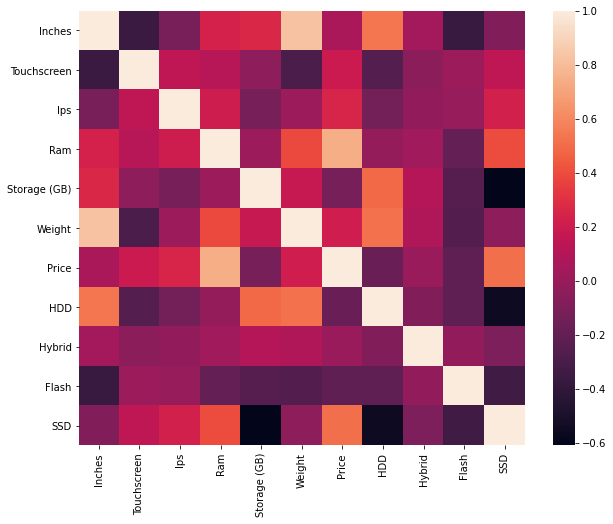

In [26]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr())

As we can se Hybrid has negligible contribution so we will drop it 

In [27]:
data.drop('Hybrid',axis=1,inplace=True)

data.head(10)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Gpu_Vender,Weight,OpSys,Price,HDD,Flash,SSD
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,Intel,1.37,Mac,113753.0779,0,0,1
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,Intel,1.34,Mac,76328.9954,0,1,0
2,HP,Notebook,15.6,0,0,Intel,8,256,Intel,1.86,Others/No OS/Linux,48823.2500,0,0,1
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,AMD,1.83,Mac,215454.8795,0,0,1
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,Intel,1.37,Mac,153143.6760,0,0,1
5,Acer,Notebook,15.6,0,0,AMD,4,500,AMD,2.10,Windows,33964.0000,1,0,0
6,Apple,Ultrabook,15.4,0,1,Intel,16,256,Intel,2.04,Mac,181704.8527,0,1,0
7,Apple,Ultrabook,13.3,0,0,Intel,8,256,Intel,1.34,Mac,98385.2170,0,1,0
8,Asus,Ultrabook,14.0,0,0,Intel,16,512,Nvidia,1.30,Windows,126940.4500,0,0,1
9,Acer,Ultrabook,14.0,0,1,Intel,8,256,Intel,1.60,Windows,65380.7000,0,0,1


Analysing Gpu Vendor 

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Gpu_Vender,Weight,OpSys,Price,HDD,Flash,SSD
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,True,1.37,Mac,113753.0779,0,0,1
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,True,1.34,Mac,76328.9954,0,1,0
2,HP,Notebook,15.6,0,0,Intel,8,256,True,1.86,Others/No OS/Linux,48823.2500,0,0,1
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,True,1.83,Mac,215454.8795,0,0,1
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,True,1.37,Mac,153143.6760,0,0,1


In [55]:
data2= pd.read_csv('laptop_price(3rd).csv')

data2.head()

,Unnamed: 0,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60


In [56]:
data['Gpu Brand'] = data2['Gpu_Vender']

data.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Gpu_Vender,Weight,OpSys,Price,HDD,Flash,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,True,1.37,Mac,113753.0779,0,0,1,Intel
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,True,1.34,Mac,76328.9954,0,1,0,Intel
2,HP,Notebook,15.6,0,0,Intel,8,256,True,1.86,Others/No OS/Linux,48823.2500,0,0,1,Intel
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,True,1.83,Mac,215454.8795,0,0,1,AMD
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,True,1.37,Mac,153143.6760,0,0,1,Intel


In [57]:
data.drop('Gpu_Vender',axis=1,inplace=True)

data.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Ram,Storage (GB),Weight,OpSys,Price,HDD,Flash,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,0,1,Intel,8,128,1.37,Mac,113753.0779,0,0,1,Intel
1,Apple,Ultrabook,13.3,0,0,Intel,8,128,1.34,Mac,76328.9954,0,1,0,Intel
2,HP,Notebook,15.6,0,0,Intel,8,256,1.86,Others/No OS/Linux,48823.2500,0,0,1,Intel
3,Apple,Ultrabook,15.4,0,1,Intel,16,512,1.83,Mac,215454.8795,0,0,1,AMD
4,Apple,Ultrabook,13.3,0,1,Intel,8,256,1.37,Mac,153143.6760,0,0,1,Intel


C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu Brand', ylabel='count'>

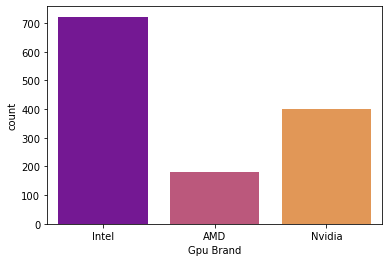

In [59]:
data = data[data['Gpu Brand']!="ARM"]

sb.countplot(data['Gpu Brand'],palette='plasma')

In [60]:
data['OpSys'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OpSys, dtype: int64

In [62]:
data['Cpu_Vender'].value_counts()

Intel    1240
AMD        62
Name: Cpu_Vender, dtype: int64

C:\Users\Brij Bhushan Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


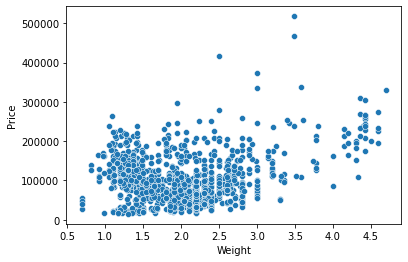

In [64]:
sb.scatterplot(data['Weight'],data['Price'])
plt.show()

<AxesSubplot:>

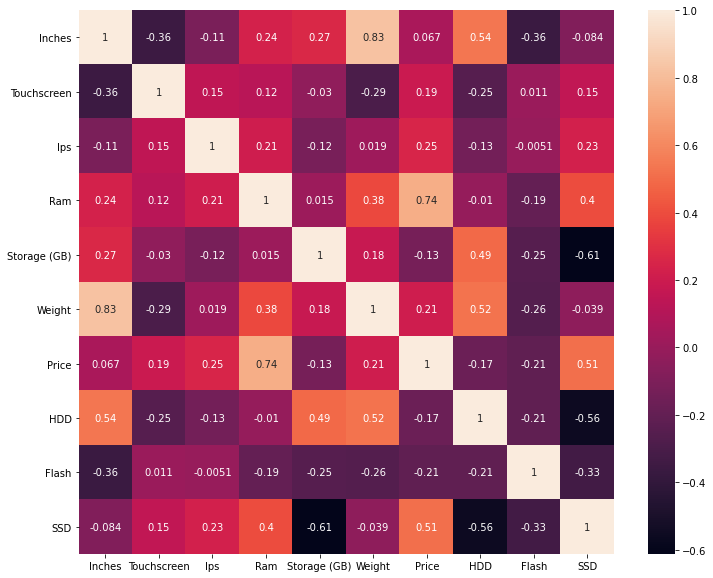

In [66]:
plt.figure(figsize = (12,10))
sb.heatmap(data.corr(),annot=True)